В данном проекте я проверю гипотезы для увеличения выручки. С этой целью я приоритизирую гипотезы, запущу A/B-тест и проанализирую его результаты 

План:

Часть 1

1.Приоритизация гипотезы на основе ICE 
2.Приоритизация гипотезы на основе RICE 
3.Сопоставление приоритизаций гипотез

Часть 2

1.График кумулятивной выручки по группам
2.График кумулятивного среднего чека по группам
3.График относительного изменения кумулятивного среднего чека группы B к группе A
4.График кумулятивного среднего количества заказов на посетителя по группам. 
5.График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
6.Точечный график количества заказов по пользователям.
7.95-й и 99-й перцентили количества заказов на пользователя
8.Точечный график стоимостей заказов
9.95-й и 99-й перцентили стоимости заказов
10.Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
11.Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
12.Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
13.Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
14.Результаты

In [1]:
from scipy import stats as st
import numpy as np
import math as mth
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


Добавляю все необходимые библиотеки

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')


In [3]:
data ['ICE'] = data ['Impact'] * data ['Confidence'] / data ['Efforts']

print (data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))



                                          Hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


In [4]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence']/ data['Efforts']

print (data[['Hypothesis', 'RICE']].sort_values( by = 'RICE', ascending = False))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


1. Приоритизация гипотез изменилась из-за того, что формат ICE не учитывает охвата пользователей.
2.При примении RICE вместо ICE было показано, что добавление формы подписки на все основные страницы является наиболее приоритетной гипотизой в сравнении с другими. 
3. При этом запуск акции, дающей скидку на товар в день оказалась плоховостребованной гипотезой. 
4. Добавление формы подписки на все остальные страницы охватывает наибольшее количество пользователей. Уверенность в том, что эта мера окажется эффективной достаточно высокая. Кроме того, на нее, судя по всему, нужно потратить много усилий. 
5. Запуск акции, дающей скидку на товар окажет сильное влияние, но на гораздо более узкую аудиторию. Кроме того, на эту меру так же потребуется много усилий сотрудников

Часть № 2. 

In [5]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Как видно, столбец date сохранен в типе object. Его нужно переписать в формат datetime

In [6]:
visitors =  pd.read_csv('/datasets/visitors.csv', sep=',')

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


То же самое и с датафреймом visitors. Необходимо привести date к datetime

In [7]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [8]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Пропусков в обоих датафреймах не обнаружено

In [9]:
orders.duplicated().sum()

0

In [10]:
visitors.duplicated().sum()

0

Дубликатов в обоих датафреймах не обнаружено

In [11]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Привожу оба столба к формату datetime после чего начинаю A/B тестирование

In [12]:
double_visitors_total = orders.groupby('visitorId').agg({'group':'nunique'}).query('group>1').count()
double_visitors_total

group    58
dtype: int64

В таблице orders были обнаружены пользователи в обеих группах. В целом, это может привести к искажению анализу. Но в рамках проекта я их оставлю

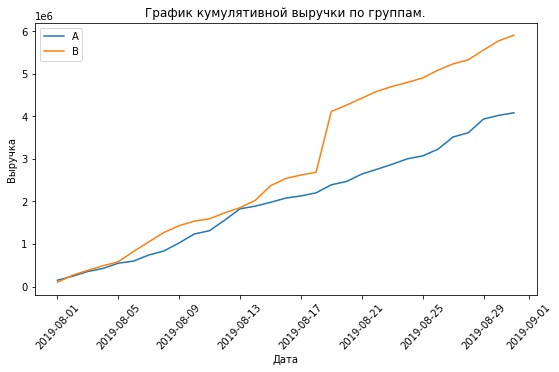

In [13]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize =(9, 5)) 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам.')
plt.xticks(rotation=47)
plt.show()

С середины теста группа B вырывается резко растет и остается лидером до самого конца. Судя по всему, в этот промежуток появились
аномально дорогие заказы, что повлияло на результат

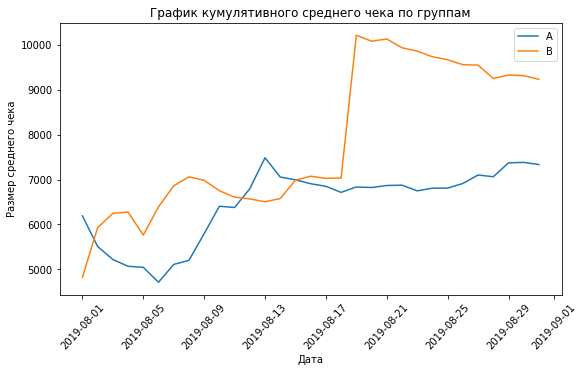

In [14]:
plt.figure(figsize =(9, 5)) 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

plt.xlabel('Дата')
plt.ylabel('Размер среднего чека')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=47)
plt.show()

График показывает, что в группе B действительно оказались заказы с аномально высокими средними чеками. Произошло это к середине теста. Тем не менее, к концу в группе B вновь наметилось снижение среднего чека.

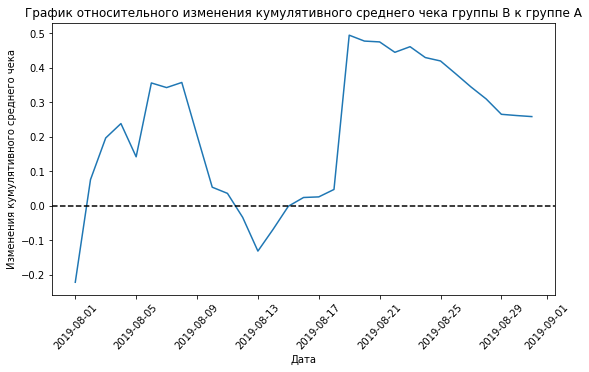

In [15]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize =(9, 5)) 

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Изменения кумулятивного среднего чека')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=47)
plt.show()


График относительного изменения кумулятивного среднего чека группы B к группе A показал, что в нескольких датах средний чек действительно резко менялся. Значит, в эти дни наблюдались аномальные выбросы. Их можно найти

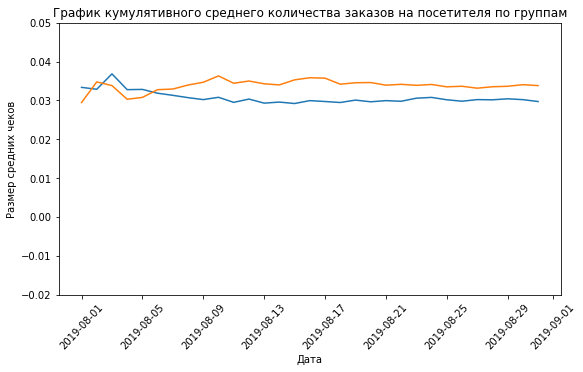

In [16]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize =(9, 5)) 

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')


plt.xlabel('Дата')
plt.ylabel('Размер средних чеков')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=47)
plt.ylim(-0.02, 0.05)
plt.show()



Коллебания графиков очень сильные. Несмотря на то, что в начале эксперимента группа B отставала, вскоре она вырвалась вперед и до конца теста находилась в лидерах, хотя и с небольшим снижением. Конверсия средних чеков показывает, что в группе B было значительно больше выручки. Кроме того, сильные коллебания демонстрируют, что не установилась вокруг своего среднего значения 

Масштаб действительно очень большой. Из-за этого коллебания кажутся значительными. 

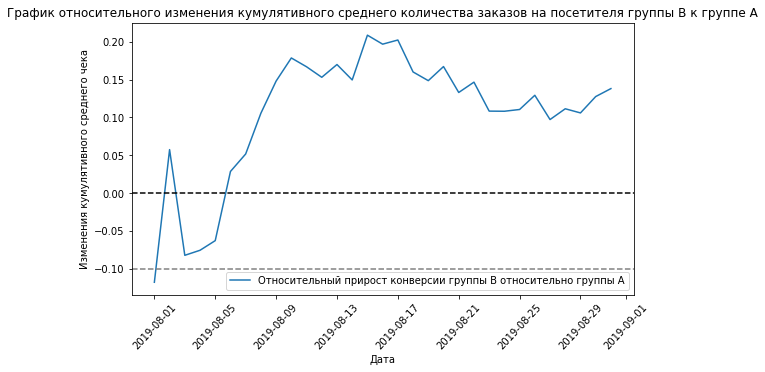

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize =(9, 5)) 

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Изменения кумулятивного среднего чека')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=47)
plt.show()


График относительного различия конверсии между группами показывает, что с самого начала теста группа B вырвалась в лидеры и зафиксировалась где-то в районе 15% относительно группы A.

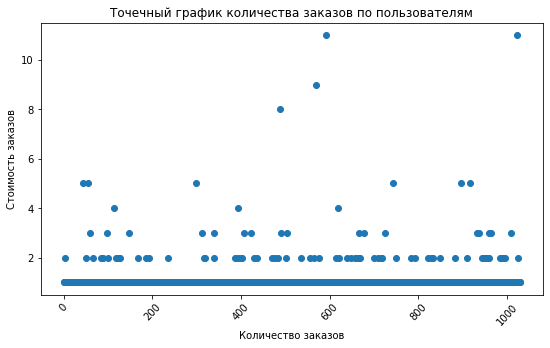

In [18]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize =(9, 5)) 

plt.scatter(x_values, ordersByUsers['orders']) 

plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов')
plt.title('Точечный график количества заказов по пользователям')
plt.xticks(rotation=47)
plt.show()


Как видно из графика, пользователей заказавших более двух раз меньше остальных. Из этого можно сделать вывод, что именно они являются источником аномалий. 

In [19]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 


[2. 4.]


Не более 5% пользователей совершило больше 2 заказов и не более 1 % пользователей совершило больше 4 заказов.

В качестве границы для отсеивания аномалий выбрано 2 заказа и более

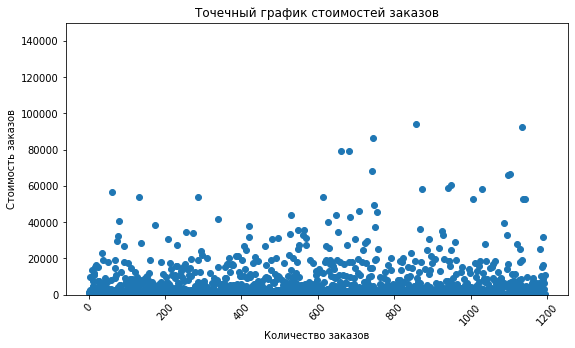

In [20]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize =(9, 5)) 

plt.scatter(x_values, orders['revenue']) 

plt.ylim([0,150000])

plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов')
plt.title('Точечный график стоимостей заказов')
plt.xticks(rotation=47)
plt.show()



Как видно из точечного графика, есть  заказы дороже 20000. Заказ дороже 1 млн., само собой, является аномалией. 

In [21]:
print(np.percentile(orders['revenue'], [95, 99])) 


[28000.  58233.2]


Не более чем 5 % чек дороже 28000. И лишь у 1% чек дороже 58233 рублей

В качестве границы аномалий выбраны все заказы дороже 28000

Нулевая гипотеза: статистически значимых различий в среднем числе заказов между группами нет

Альтернативная гипотеза: статистически значимые различия в среднем числе заказов между группами есть

Критический уровень статистической значимости - 0.05

Применим статистический критерий Манна-Уитни к полученным выборкам

In [22]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')

orders['date'] = pd.to_datetime(orders['date'])


visitors =  pd.read_csv('/datasets/visitors.csv', sep=',')

visitors['date'] = pd.to_datetime(visitors['date'])



visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)



ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


P-value ниже 0.05.  Нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8% — второе число в выводе.

Нулевая гипотеза: в среднем чеке есть различия

Альтернативная гипотеза: в среднем чеке нет различий

Критический уровень статистической значимости - 0.05

Применим статистический критерий Манна-Уитни


In [23]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно выше среднего чека группы A - 25.9% 

In [24]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [25]:
print(abnormalUsers.shape[0]) 


74


Количество аномальный пользователей составляет 74

Нулевая гипотеза: статистически значимых различий в среднем числе заказов между группами нет

Альтернативная гипотеза: статистически значимые различия в среднем числе заказов между группами есть

Критический уровень статистической значимости - 0.05

Применим статистический критерий Манна-Уитни к полученным выборкам

In [26]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [27]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.173


Результат по среднему чеку незначительно изменился. По сравнению с сырыми данными, увеличился P-value и относительный выигрышь группы B. Нулевую гипотезу отвергаем

Нулевая гипотеза: в среднем чеке есть различия

Альтернативная гипотеза: в среднем чеке нет различий

Критический уровень статистической значимости - 0.05

Применим статистический критерий Манна-Уитни

In [28]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


0.738
-0.020


После удаления аномалий немного вырос P-value и значительно сократился средний чек группы B, уйдя в минус на 0.2%. Таким образом статистических различий между двумя группами после удаления аномалий нет. Нулевую гипотезу сохраняем

Результаты проведения теста:

1. Между группами по сырым данным существуют статистические занимые различия. Относительный выигрышь группы B при этом составил 13.8%. 
2. После очистки сырых данных от аномалий, статистические значимые различия сохранились. При этом выигрышь группы B только увеличился.
3. До удаления аномальных данных существовали статистические значимые различия в стоимости средних чеков. Эти различия сохранились и после удаление аномальных данных. 
4. Важно, что выигрышь группы B после удаления аномальных данных исчез. 



На мой взгляд можно продолжить тестирование, потому что конверсия не пришла к среднему значению и сильно колебалась, а после проведения тестирования оказалось, что группа A даже прогигрывает группе A

В свете дополнительной работы было принято решение остановить тест

Как показал тест, выручка в группе B превышает группу А при сохранении почти одинакового чека. Кроме того, график куммулятивного среднего количество заказов стремиться к норме, что подтверждает правильность выводов итогов тестирования 

Итоги: 

1 часть. 

1. Приоритизация гипотез изменилась из-за того, что формат ICE не учитывает охвата пользователей.
2. При примении RICE вместо ICE было показано, что добавление формы подписки на все основные страницы является наиболее
3. приоритетной гипотизой в сравнении с другими.
4. При этом запуск акции, дающей скидку на товар в день оказалась плоховостребованной гипотезой.
5. Добавление формы подписки на все остальные страницы охватывает наибольшее количество пользователей. Уверенность в том, что эта мера окажется эффективной достаточно высокая. Кроме того, на нее, судя по всему, нужно потратить много усилий.
6. Запуск акции, дающей скидку на товар окажет сильное влияние, но на гораздо более узкую аудиторию. Кроме того, на эту меру так же потребуется много усилий сотрудников

2 часть. 

1.Между группами по сырым данным существуют статистические занимые различия. Относительный выигрышь группы B при этом составил 13.8%.
2. После очистки сырых данных от аномалий, статистические значимые различия сохранились. При этом выигрышь группы B только увеличился.
3. До удаления аномальных данных существовали статистические значимые различия в стоимости средних чеков. Эти различия сохранились и после удаление аномальных данных.
Важно, что выигрышь группы B после удаления аномальных данных исчез.

Тест можно продолжить 